In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, get_plotlyjs
import plotly.express as px
import plotly.io as pio
pio.renderers.default='iframe_connected'
import seaborn as sns
import itertools
import statsmodels.api as sm
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import scipy
import sklearn
import warnings 
warnings.filterwarnings('ignore')
import os
os.system('jupyter nbconvert --to html Retail_Data_EDA.ipynb')

# Import all libraries and tools

65280

In [124]:
    """ 
    Reading in 3 tables from Google Cloud Storage bucket.
    (Furniture table, Office supplies table and Technology table)
    
    """

furn_df= pd.read_csv('gs://wcd-ml-project-manny/Category files/Furniture')
furn_df.head()
furn_df.shape
# Read in the dataset as 'furn_df' and view top 5 rows

office_df= pd.read_csv('gs://wcd-ml-project-manny/Category files/Office')
office_df.head()
office_df.shape
# Read in the dataset as 'office_df' and view top 5 rows

tech_df= pd.read_csv('gs://wcd-ml-project-manny/Category files/Technology')
tech_df.head()
tech_df.shape
# Read in the dataset as 'tech_df' and view top 5 rows

full_df= pd.read_csv('gs://wcd-ml-project-manny/US Superstore data.csv')
full_df.head()
full_df.shape
# Read in the dataset as 'full_df' and view top 5 rows


(9994, 21)

In [125]:
    """
    Checking tables for null values.
    """

#furn_df.isnull().any()
#office_df.isnull().any()
#tech_df.isnull().any()
full_df.isnull().any()

#Using '.isnull().any()' provides boolean values True or False for each column 

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

# Exploring & Understanding Transactions

### Top 25 Customers with the Most Transactions

William Brown  Matt Abelman  John Lee  Paul Prost  \
Customer Name             37            34        34          34   

               Chloris Kastensmidt  Edward Hooks  Seth Vernon  \
Customer Name                   32            32           32   

               Jonathan Doherty  Emily Phan  Arthur Prichep  ...  Greg Tran  \
Customer Name                32          31              31  ...         29   

               Ken Lonsdale  Kunst Miller  Chris Selesnick  Keith Dawkins  \
Customer Name            29            28               28             28   

               Xylona Preis  Clay Ludtke  Ben Ferrer  Damala Kotsonis  \
Customer Name            28           28          27               27   

               Patrick Gardner  
Customer Name               26  

[1 rows x 25 columns]

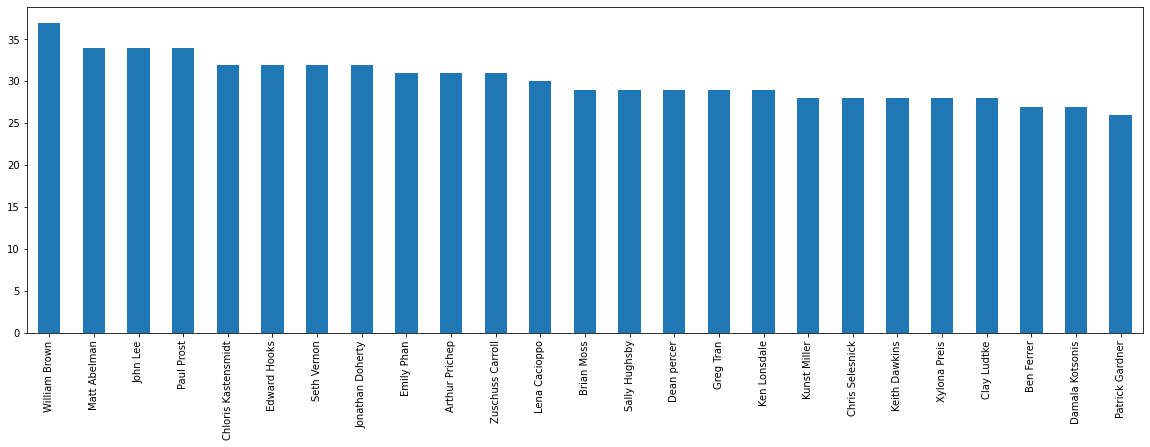

In [126]:
cus_purchases=full_df['Customer Name'].value_counts()[:25]
top_cus_purchases=pd.DataFrame(cus_purchases)
top_cus_purchase=pd.DataFrame.transpose(top_cus_purchases)
#Create dataframe with number of transactions per customer in descending order (Top 25 customers with the most transactions)
cus_purchases.plot(kind='bar', figsize=(20,6))
# Number of transactions in decending order with Customer Name (Top 25 Customers with most transactions)
top_cus_purchase

# Number of Transactions per Category

## Interactive Pie Chart Transactions per Category + Percentage of Total Transactions
##### Interactive Pie chart showing sum of Transactions per 'Category' and percentage of total Transactions (Plotly)
##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the orange Furniture tab on the right to eliminate Furniture data, click it again to add it back)
###### (Click the 3 dots below to view code for cell)

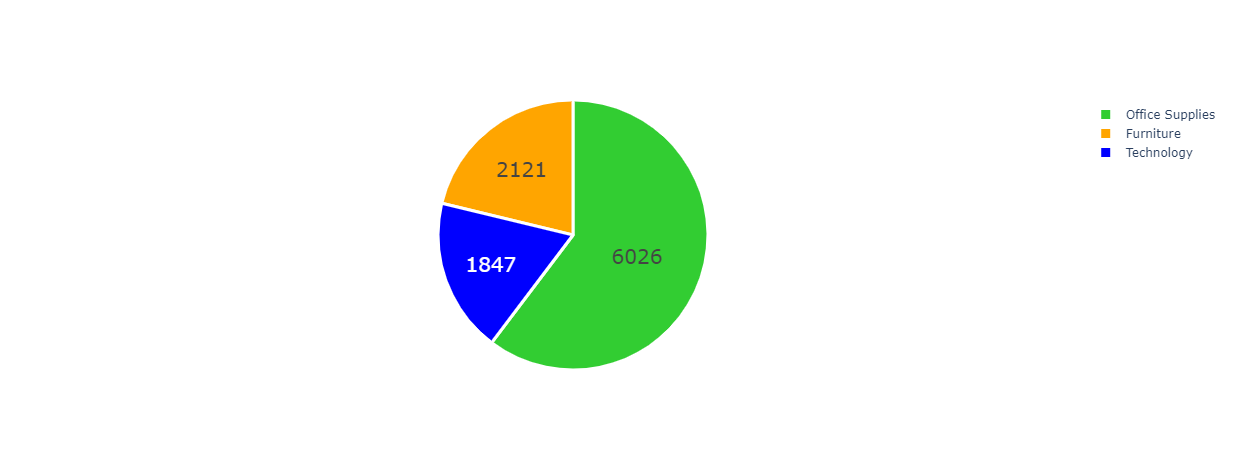

In [127]:
top_cat=full_df['Category'].value_counts()
top_cat=pd.DataFrame(top_cat)
top_cat=pd.DataFrame.transpose(top_cat)
off_cat=top_cat['Office Supplies']
furn_cat=top_cat['Furniture']
tech_cat=top_cat['Technology']
#Number of transactions per 'Category' column
#Split into a dataframe for each Category (All transactions that are in each Category(Office Supplies, Furniture, Technology))
labels=['Office Supplies', 'Furniture', 'Technology']
values=[off_cat[0], furn_cat[0], tech_cat[0]]
colors=['limegreen', 'orange', 'blue']
trace= go.Pie(labels=labels, values=values,
              hoverinfo='label+percent', textinfo='value',
              textfont=dict(size=20),
              marker=dict(colors=colors, 
                    line=dict(color='white', width=3)))
iplot([trace])
#Interactive Pie chart showing sum of Transactions per 'Category' and percentage of total Transactions (Plotly)
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the orange Furniture tab on the right to eliminate Furniture data, click it again to add it back)

# Number of Transactions per 'Sub-Category'

In [128]:
sub_cat=full_df['Sub-Category'].value_counts()
sub_cat=pd.DataFrame(sub_cat)
sub_cat=pd.DataFrame.transpose(sub_cat)
sub_cat

# Number of transactions per sub-categories

Binders  Paper  Furnishings  Phones  Storage  Art  Accessories  \
Sub-Category     1523   1370          957     889      846  796          775   

              Chairs  Appliances  Labels  Tables  Envelopes  Bookcases  \
Sub-Category     617         466     364     319        254        228   

              Fasteners  Supplies  Machines  Copiers  
Sub-Category        217       190       115       68

## Number of Transactions per Sub-Category: Office Supplies

<AxesSubplot:>

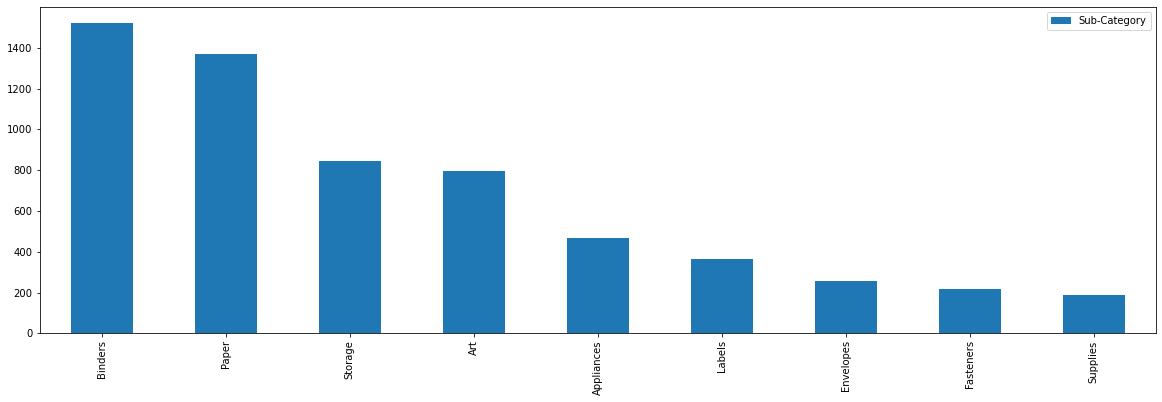

In [129]:
office_sup=full_df.loc[full_df['Category'].isin(['Office Supplies'])]
office_sup
office_count=office_sup['Sub-Category'].value_counts()
office_count=pd.DataFrame(office_count).plot(kind='bar', figsize=(20,6))
#office_count=pd.DataFrame.transpose(office_count)
office_count
# Create sub dataframe where 'Office Supplies' is in 'Category' column and assign it to 'office_sup'.
# Count number of transactions for each 'Sub-Category' value in the 'office_Sup' dataframe and assign it to 'office_count'.

## Number of Transactions per Sub-Category: Furniture

<AxesSubplot:>

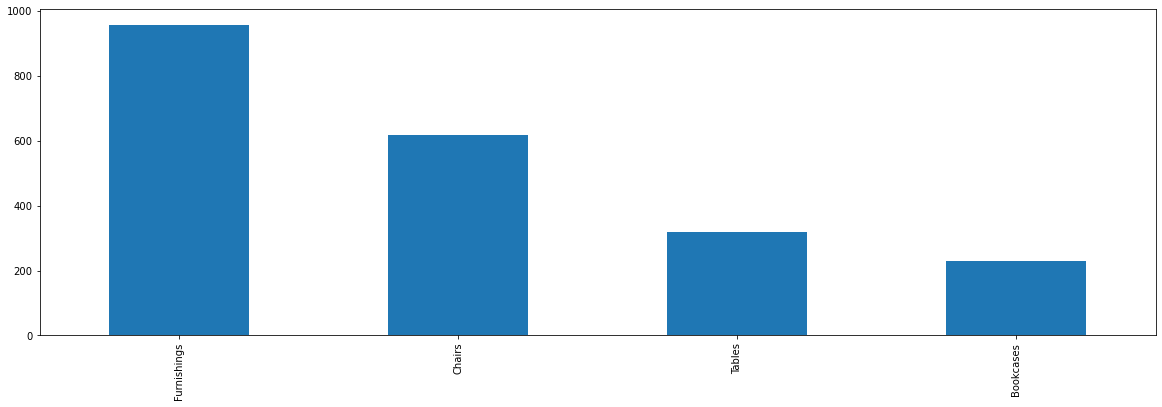

In [130]:
furn_sub=full_df.loc[full_df['Category'].isin(['Furniture'])]
furn_sub
furn_count=furn_sub['Sub-Category'].value_counts().plot(kind='bar', figsize=(20,6))
furn_count
# Create sub dataframe where 'Furniture' is in 'Category' column and assign it to 'furn_sub'.
# Count number of transactions for each 'Sub-Category' value in the 'furn_sub' dataframe and assign it to 'furn_count'.

## Number of Transactions per Sub-Category: Technology

<AxesSubplot:>

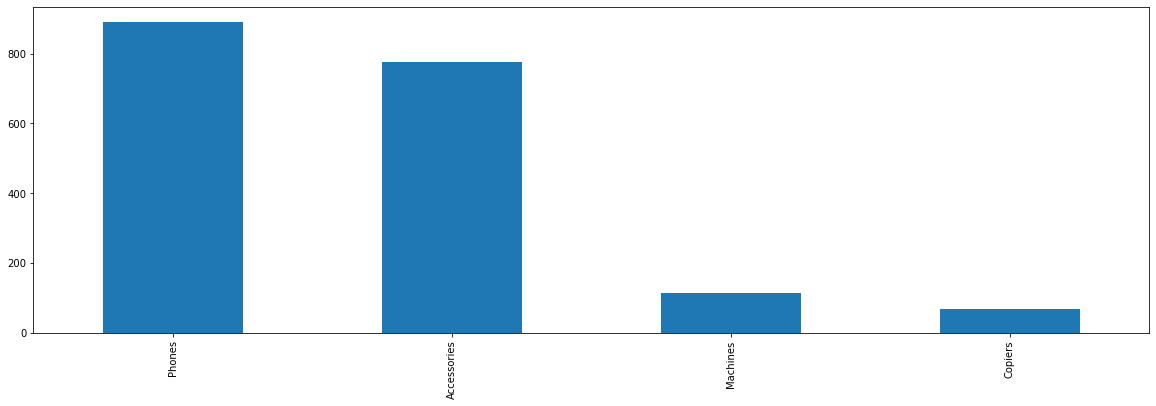

In [131]:
tech_sub=full_df.loc[full_df['Category'].isin(['Technology'])]
tech_sub
tech_count=tech_sub['Sub-Category'].value_counts().plot(kind='bar', figsize=(20,6))
tech_count
# Create sub dataframe where 'Technology' is in 'Category' column and assign it to 'tech_sub'.
# Count number of transactions for each 'Sub-Category' value in the 'tech_sub' dataframe and assign it to 'tech_count'.

## Products with the Most Transactions (Top 25)

<AxesSubplot:>

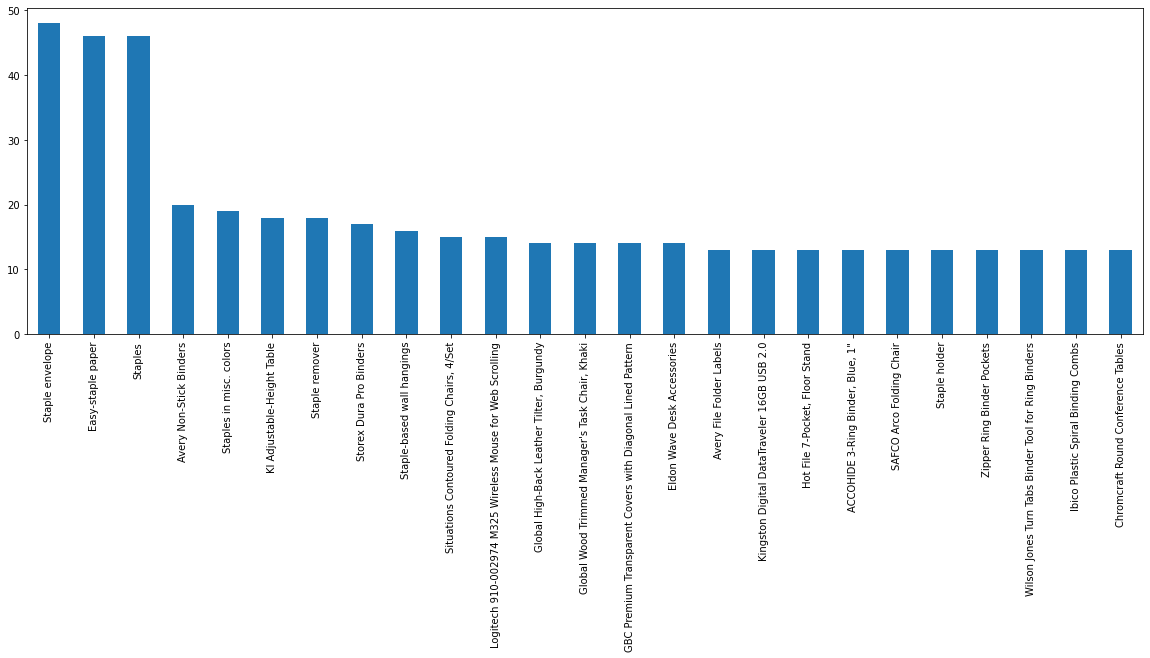

In [132]:
prod_count=full_df[['Order ID','Customer ID','Product ID', 'Product Name', 'Sub-Category', 'Category', 'City','Quantity', 'Sales', 'Profit']]
product_sales_num=prod_count['Product Name'].value_counts()[:25]
product_sales_num.plot(kind='bar', figsize=(20,6))
# Set new df as 'prod_count', containing columns 'Product_Name', 'Sub-Category', 'Category', 'City','Quantity', 'Sales' & 'Profit'
# Check top 25 best selling products and assign it to 'product_sales_num'.

## Cities with Most Transactions (Top 25)

<AxesSubplot:>

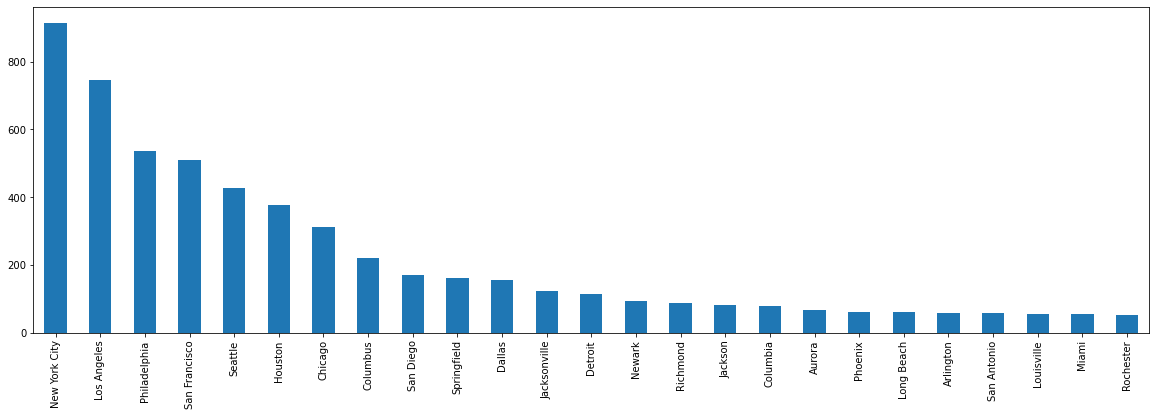

In [133]:
top_cities= full_df['City'].value_counts()[:25]
top_cities.plot(kind='bar', figsize=(20,6))
#Count number of transactions per city and display top 25

# Number of Transactions per Region

## Interactive Pie plot of number of Transactions per 'Region' with Total Percentage
##### Interactive Pie chart showing number of transactions per 'Region' and percentage of total transactions (Plotly)
##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the purple Central tab on the right to eliminate Central data, click it again to add it back)
###### (Click the 3 dots below to view code for cell)

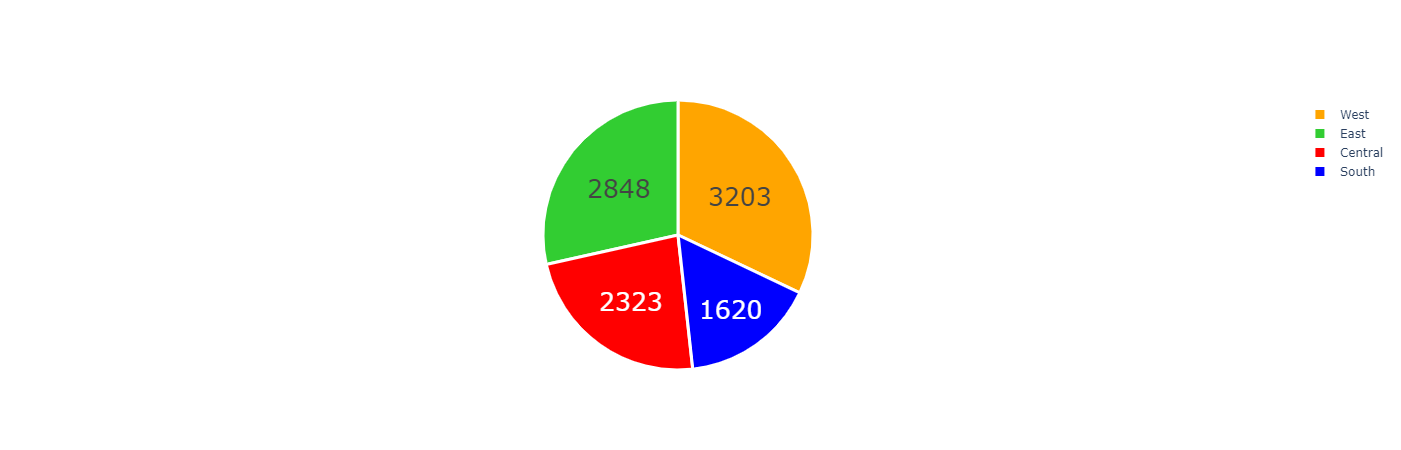

In [134]:
west_=full_df.loc[full_df['Region'].isin(['West'])]
west_=west_['Region'].value_counts()
east_=full_df.loc[full_df['Region'].isin(['East'])]
east_=east_['Region'].value_counts()
central_=full_df.loc[full_df['Region'].isin(['Central'])]
central_=central_['Region'].value_counts()
south_=full_df.loc[full_df['Region'].isin(['South'])]
south_=south_['Region'].value_counts()
#Extracting number of transactions per region and assign it to 'east_', 'west_', 'central_', 'south_'
labels=['West','East', 'Central', 'South']
values=[west_[0], east_[0], central_[0], south_[0]]
colors=['orange', 'limegreen', 'red', 'blue']
trace5= go.Pie(labels=labels, values=values, hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25), 
               marker=dict(colors=colors, 
                          line=dict(color='white', width=3)))
iplot([trace5])
#Interactive Pie chart showing number of transactions per 'Region' and percentage of total transactions (Plotly)
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the purple Central tab on the right to eliminate Central data, click it again to add it back)

# Customer Segmentation (Corporate, Consumer & Home Office Transactions)

### Interactive Pie plot of number of Transactions per 'Segment' with Total Percentage (Corporate, Consumer & Home Office Transactions)
##### Ploting number of transactions per 'Segment' value and overall percentage representation of each 'Segment' value ('Corporate', 'Consumer', 'Home Office')
##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### Example (Try clicking the green Home Office tab on the right to eliminate Home Office data, click it again to add it back)
###### (Click the 3 dots below to view code for cell)

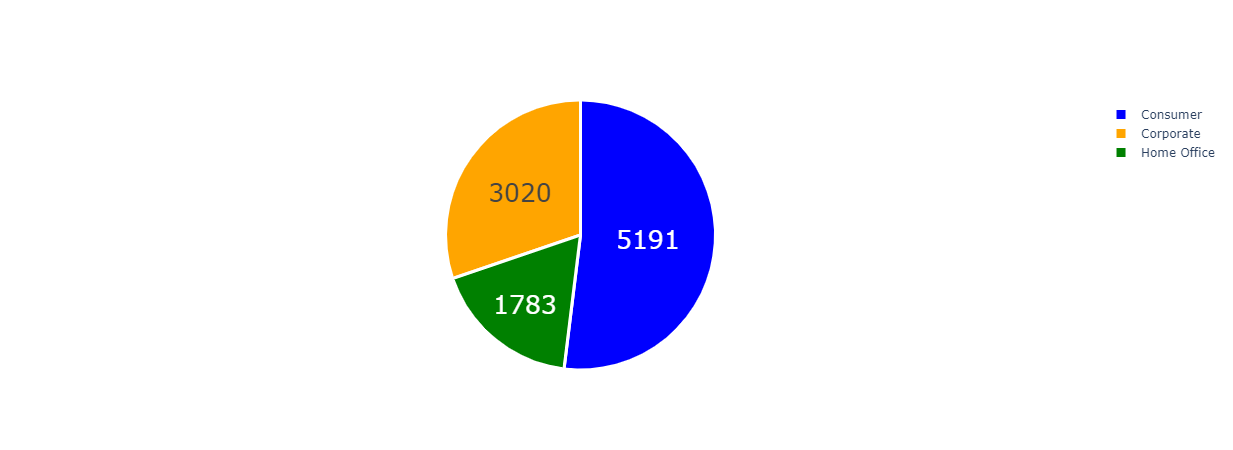

In [135]:
count_seg=full_df['Segment'].value_counts()
consum=full_df.loc[full_df['Segment'].isin(['Consumer'])]
consum=len(consum)
corpor=full_df.loc[full_df['Segment'].isin(['Corporate'])]
corpor=len(corpor)
hoof=full_df.loc[full_df['Segment'].isin(['Home Office'])]
hoof=len(hoof)
#Creating dataframe where values equal 'Consumer' in the 'Segment' column and count occurances using len() function, then assign it to 'consum'
#Creating dataframe where values equal 'Corporate' in the 'Segment' column and count occurances using len() function, then assign it to 'corpor'
groups=['Corporate', 'Consumer', 'Home Office']
amount=[corpor, consum, hoof]
colors=['orange', 'blue', 'green']
trace= go.Pie(labels=groups, values=amount,
              hoverinfo='label+percent', textinfo='value',
              textfont=dict(size=25),
              marker=dict(colors=colors, 
                          line=dict(color='white', width=3)))
iplot([trace])
#Ploting number of transactions per 'Segment' value and overall percentage representation of each 'Segment' value ('Corporate', 'Consumer', 'Home Office')
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the green Home Office tab on the right to eliminate Home Office data, click it again to add it back)

# Exploring Profit

## Total Sum of Profit per Category

### Interactive Pie plot of Total Profit per Category with Percentage
##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### Example (Try clicking the green Furniture tab on the right to eliminate Furniture data, click it again to add it back)
###### (Click the 3 dots below to view code for cell)

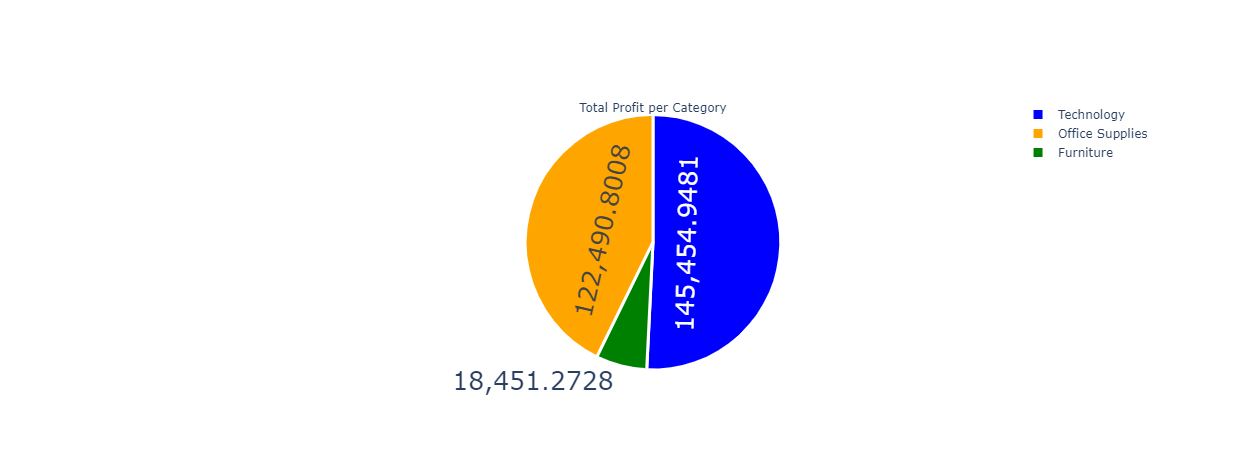

Office   Furniture   Technology
0  122490.8008  18451.2728  145454.9481

In [136]:
sum_off= office_sup['Profit'].sum()
sum_off
sum_furn=furn_sub['Profit'].sum()
sum_furn
sum_tech=tech_sub['Profit'].sum()
sum_tech
sum_cat=[[sum_off, sum_furn, sum_tech]]
cat_df=pd.DataFrame(sum_cat)
cat_df.columns=[['Office', 'Furniture', 'Technology']]
#Sum of 'Profit' column for all 3 values in the 'Category' column, assigned to dataframe cat_df(Output is profit per category)
groups=['Office Supplies', 'Furniture', 'Technology']
amount=[sum_off, sum_furn, sum_tech]
colors=['orange', 'green', 'blue']
trace= go.Pie(labels=groups, values=amount,
              hoverinfo='label+percent', textinfo='value',
              textfont=dict(size=25),
              title_text='Total Profit per Category',
              marker=dict(colors=colors,
                          line=dict(color='#ffffff', width=3)))
iplot([trace])
cat_df
#Interactive ploting of Profit per Category and total percentage 
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the green Furniture tab on the right to eliminate Furniture data, click it again to add it back)

## Customers with Highest Sales & Most Profitable (Top 25)

## Interactive Bar graph of Top 25 Most Profitable Customers
##### Graphs are interactive and provide additional data on hover and allows you to click the items in the legend to view specific data.
###### (Click the 3 dots below to view code for cell)

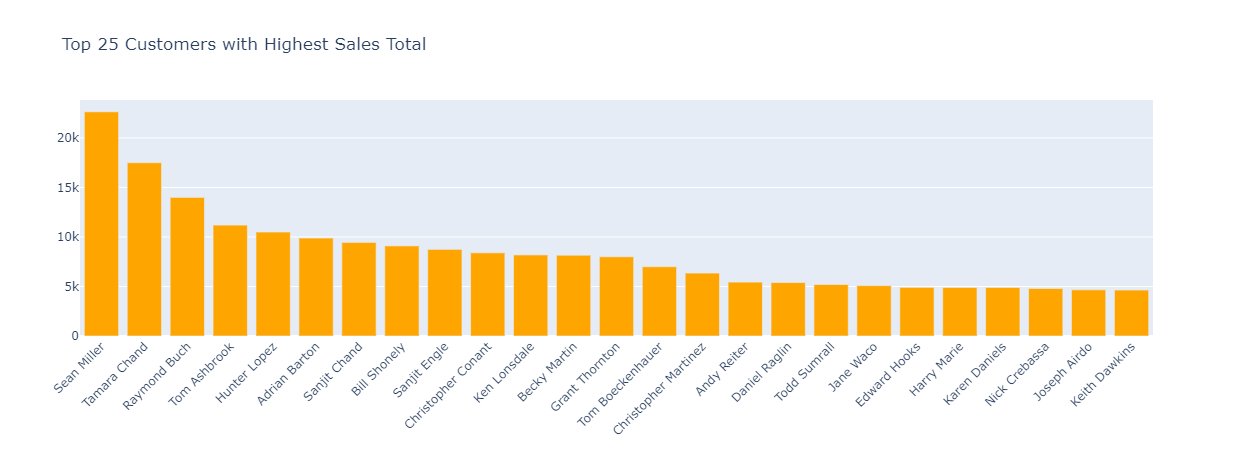

In [137]:
cus_sales=full_df['Sales'].sum()
cus_sales
cus_prof=full_df['Profit'].sum()
cus_prof
top_cus_df=full_df[['Customer Name', 'Sales', 'Profit']]
top_sales_cus=top_cus_df.sort_values('Sales', ascending=False)[:25]
top_sales_cus
top_prof_cus=top_cus_df.sort_values('Profit', ascending=False)[:25]
#top_sales_cus
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_sales_cus['Customer Name'],
    y=top_sales_cus['Sales'],
    name='Sales',
    marker_color='orange'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title_text='Top 25 Customers with Highest Sales Total', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of top 25 Customers with highest Sales totals
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

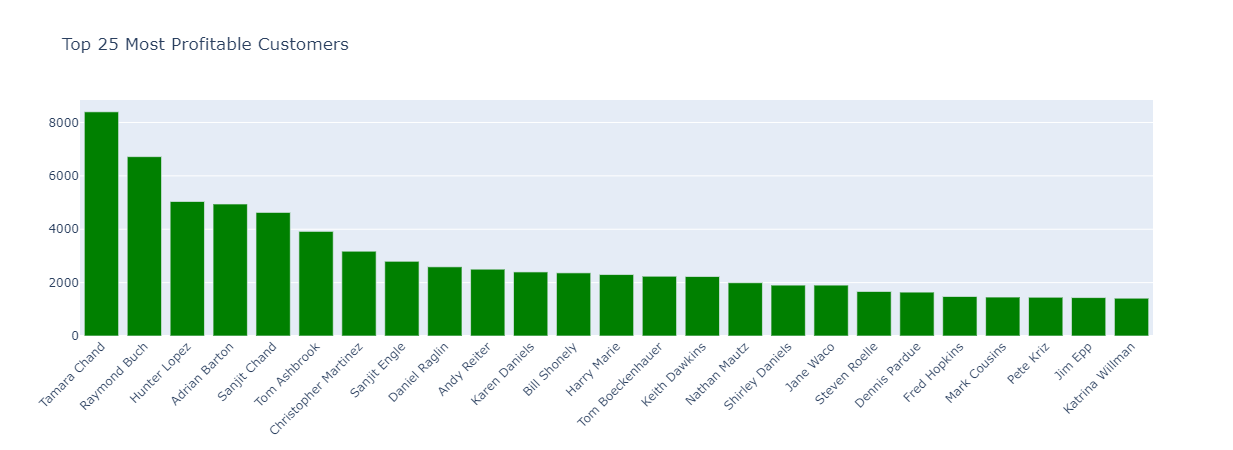

In [138]:
#Plotting top 25 most profitable customers

fig2=go.Figure()
fig2.add_trace(go.Bar(
    x=top_prof_cus['Customer Name'],
    y=top_prof_cus['Profit'],
    name='Profit',
    marker_color='green'
))
fig2.update_layout(title_text='Top 25 Most Profitable Customers', xaxis_tickangle=-45)
fig2.show()
#Interactive ploting of top 25 Most Profitable Customers
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Interactive Pie Chart of Total Profit/Sales breakdown

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
###### (Click the 3 dots below to view code for cell)

Total Profit: 286397.0217


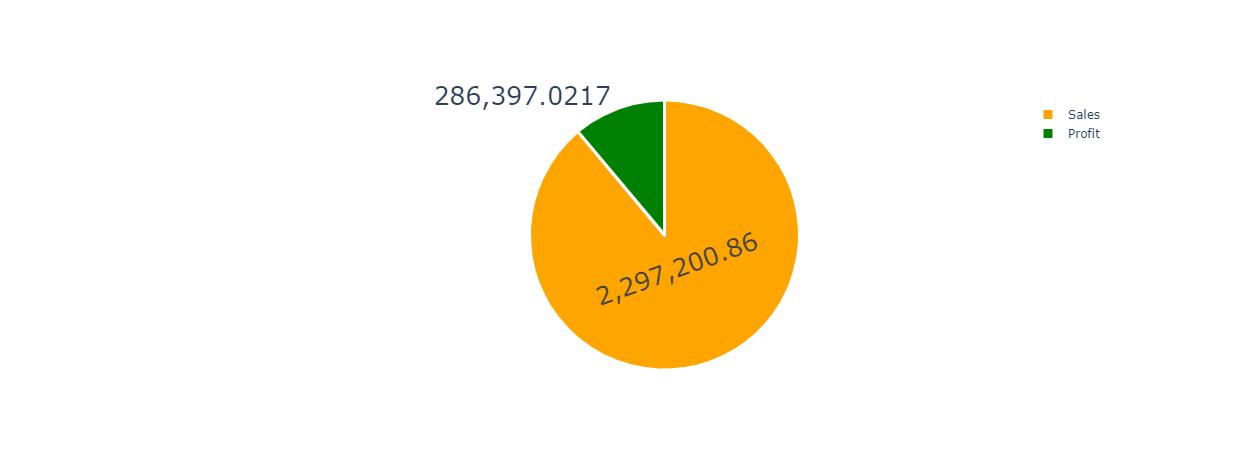

In [139]:
sum_sale=full_df['Sales'].sum()
sum_sale
#Sum of total Sales col
tot_prof=full_df['Profit'].sum()
print('Total Profit:',tot_prof)
#Sum of total Profit col
groups=['Sales', 'Profit']
amount=[sum_sale, tot_prof]
colors=['orange', 'green']
trace= go.Pie(labels=groups, values=amount,
              hoverinfo='label+percent', textinfo='value',
              textfont=dict(size=25),
              marker=dict(colors=colors, 
                          line=dict(color='#ffffff', width=3)))
iplot([trace])
#Interactive Pie chart of Total Profit/Sales breakdown
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.

## Products with the Largest Sales Transactions (Top 25 Transactions)
##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
###### (Click the 3 dots below to view code for cell)

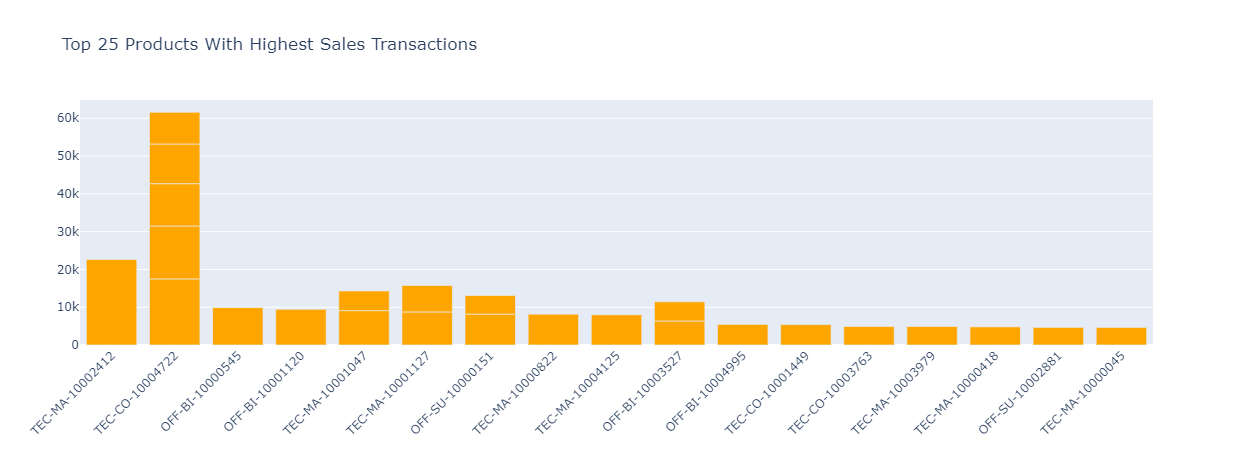

In [140]:
top_prod_df=full_df[['Product ID','Product Name', 'Sales', 'Profit']]
top_prod_count=top_prod_df.sort_values('Sales', ascending=False)[:25]
top_prod_prof=top_prod_df.sort_values('Profit', ascending=False)[:25]
top_prod_count=top_prod_count[['Product ID','Product Name', 'Sales']]
#top_prod_sales=top_prod_count.sort_values('Sales', ascending=False)[:25]
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_prod_count['Product ID'],
    y=top_prod_count['Sales'],
    name='Sales',
    marker_color='orange'
))
fig.update_layout(title_text='Top 25 Products With Highest Sales Transactions', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of top 25 Products with Highest Indivdual Sales Transactions
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Most Profitable Transactions by Product (Top 25 Transactions)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

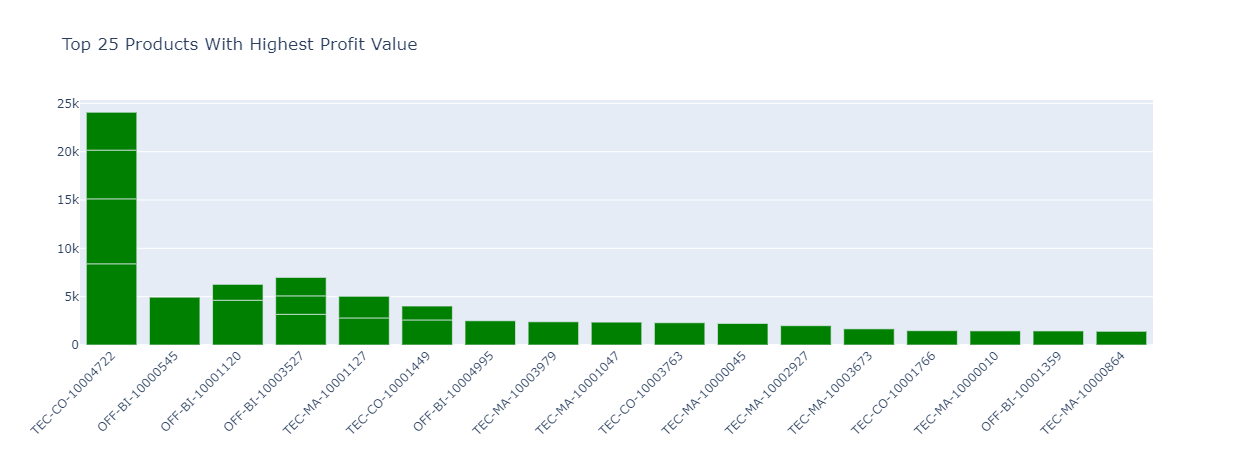

In [141]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_prod_prof['Product ID'],
    y=top_prod_prof['Profit'],
    name='Profit',
    marker_color='green'
))
fig.update_layout(title_text='Top 25 Products With Highest Profit Value', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of top 25 Most Profitable Products
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Cities with Largest Transactions (Top 25 Transactions)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

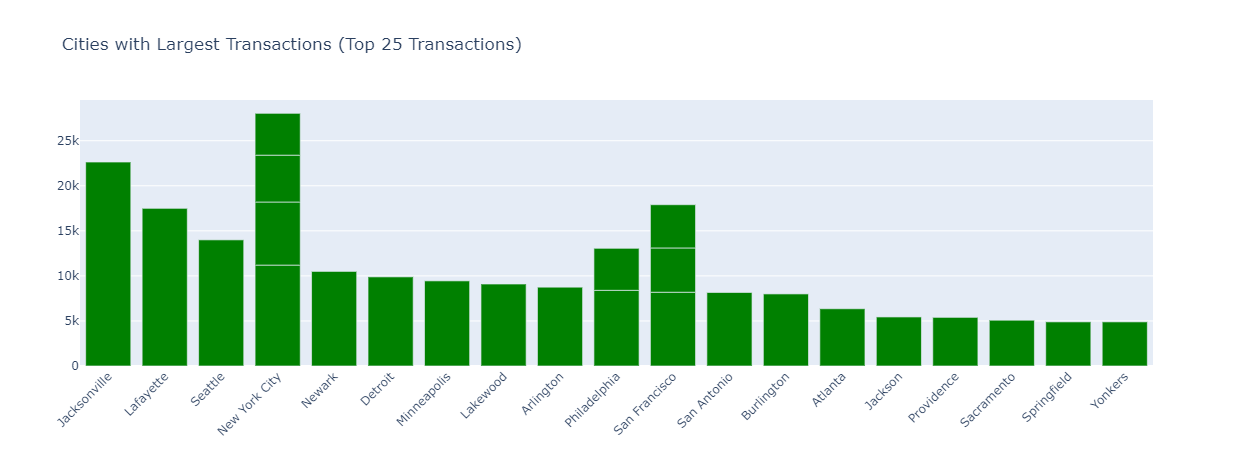

In [142]:
top_city_df=full_df[['Product Name','City','Region', 'Sales', 'Profit']]
top_city_sales=top_city_df.sort_values('Sales', ascending=False)[:25]
top_city_prof=top_city_df.sort_values('Profit', ascending=False)[:25]
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_city_sales['City'],
    y=top_city_sales['Sales'],
    name='Sales',
    marker_color='green'
))
fig.update_layout(title_text='Cities with Largest Transactions (Top 25 Transactions)', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of top 25 Cities with Highest Sales Values
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Cities with the Most Profitable Transactions (Top 25)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

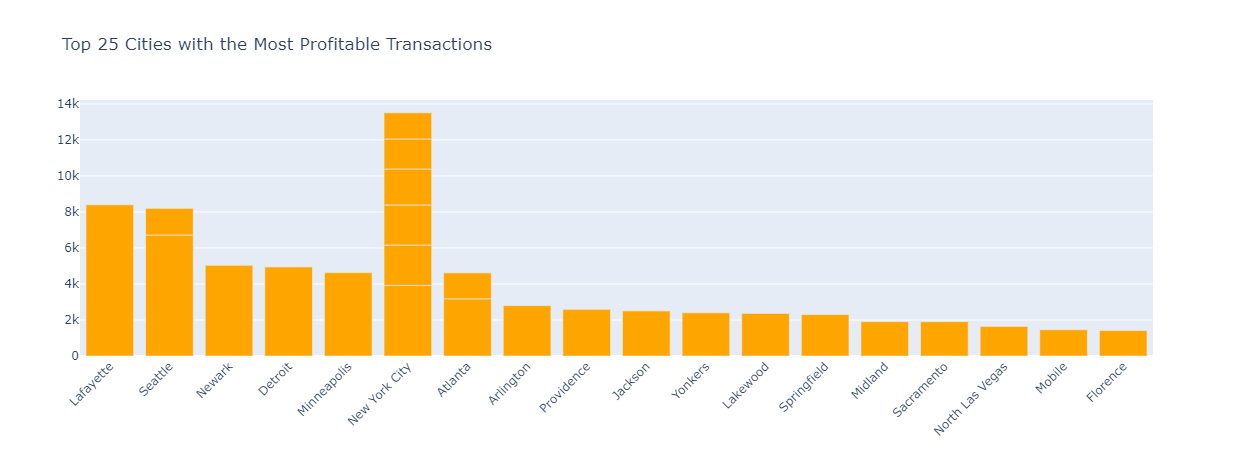

In [143]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_city_prof['City'],
    y=top_city_prof['Profit'],
    name='Profit',
    marker_color='orange'
))
fig.update_layout(title_text='Top 25 Cities with the Most Profitable Transactions', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of Top 25 Cities with the Most Profitable Transactions
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Highest Sales Transactions per Region (Top 25 Transactions)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

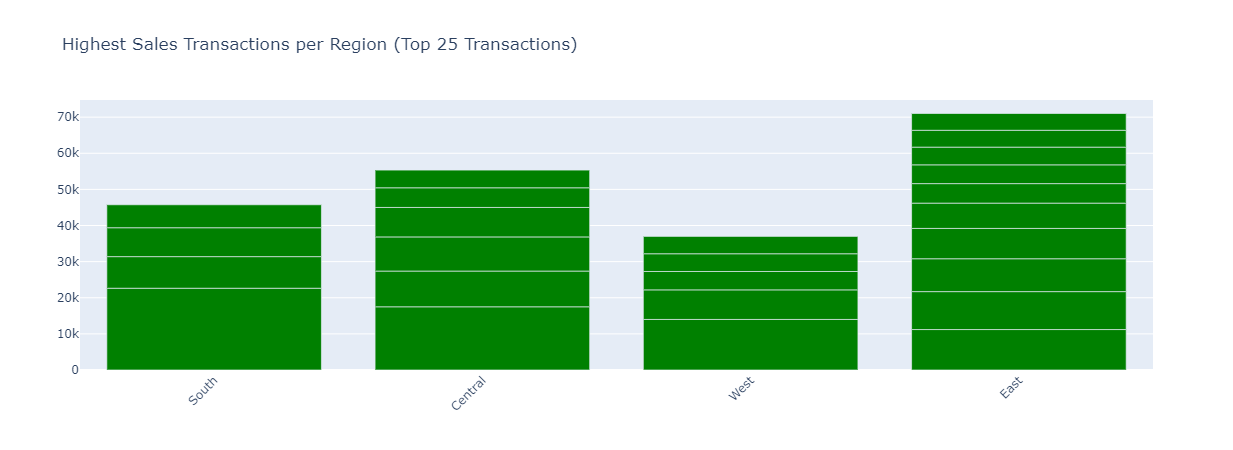

In [144]:
top_cat_df=full_df[['Category','Sub-Category','Region', 'Sales', 'Profit']]
top_reg_sales=top_cat_df.sort_values('Sales', ascending=False)[:25]
top_reg_prof=top_cat_df.sort_values('Profit', ascending=False)[:25]
top_cat_sales=top_cat_df.sort_values('Sales', ascending=False)[:50]
top_cat_prof=top_cat_df.sort_values('Profit', ascending=False)[:50]
top_sub_sales=top_cat_df.sort_values('Sales', ascending=False)[:50]
top_sub_prof=top_cat_df.sort_values('Profit', ascending=False)[:50]
#
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_reg_sales['Region'],
    y=top_reg_sales['Sales'],
    name='Sales',
    marker_color='green'
))
fig.update_layout(title_text='Highest Sales Transactions per Region (Top 25 Transactions)', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of Top 25 Highest Sales values per Region
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Most Profitable Transactions per Region (Top 25)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

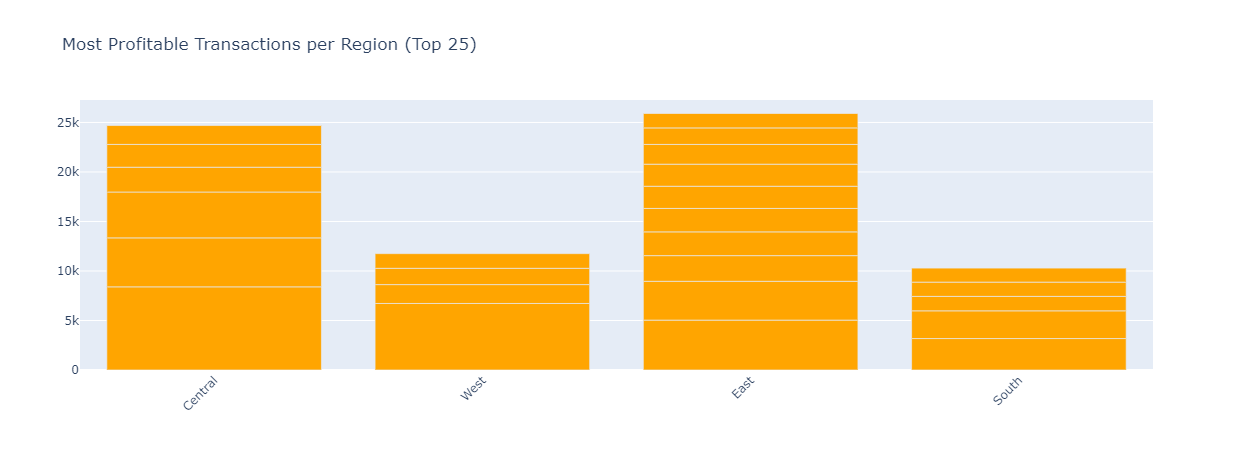

In [145]:
fig=go.Figure()
fig.add_trace(go.Bar(
    x=top_reg_prof['Region'],
    y=top_reg_prof['Profit'],
    name='Profit',
    marker_color='orange'
))
fig.update_layout(title_text='Most Profitable Transactions per Region (Top 25)', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of Top 25 Highest Profit Values per Region
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Highest Sales Values & Most Profitable Transactions by Category (Top 50)

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

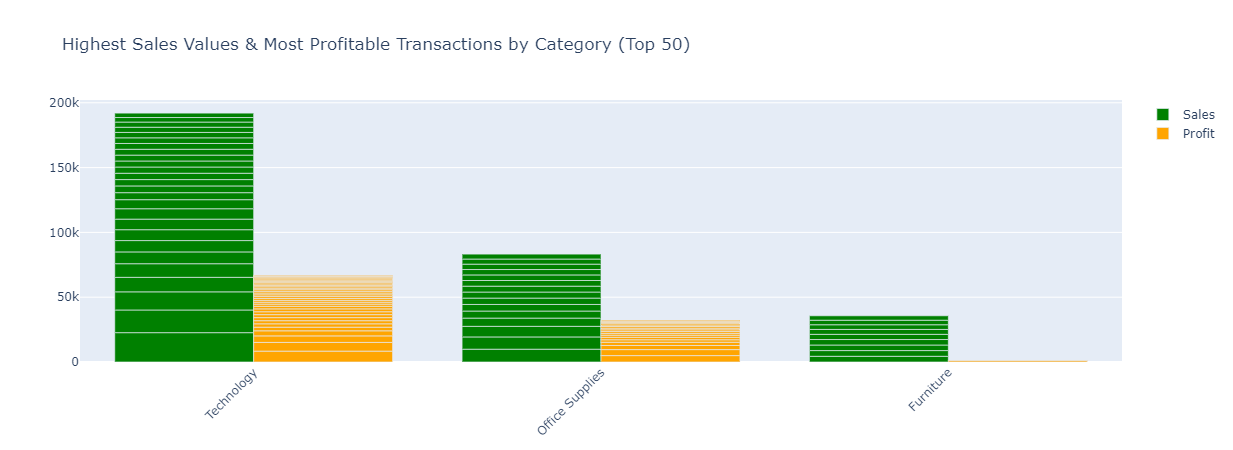

In [146]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_cat_sales['Category'],
    y=top_cat_sales['Sales'],
    name='Sales',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=top_cat_prof['Category'],
    y=top_cat_prof['Profit'],
    name='Profit',
    marker_color='orange'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', title_text='Highest Sales Values & Most Profitable Transactions by Category (Top 50)', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of Top 50 Highest Sales Values & Most Profitable Transactions per Region
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

## Highest Sales Values & Most Profitable Transactions per Sub-Category

##### Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)
###### (Click the 3 dots below to view code for cell)

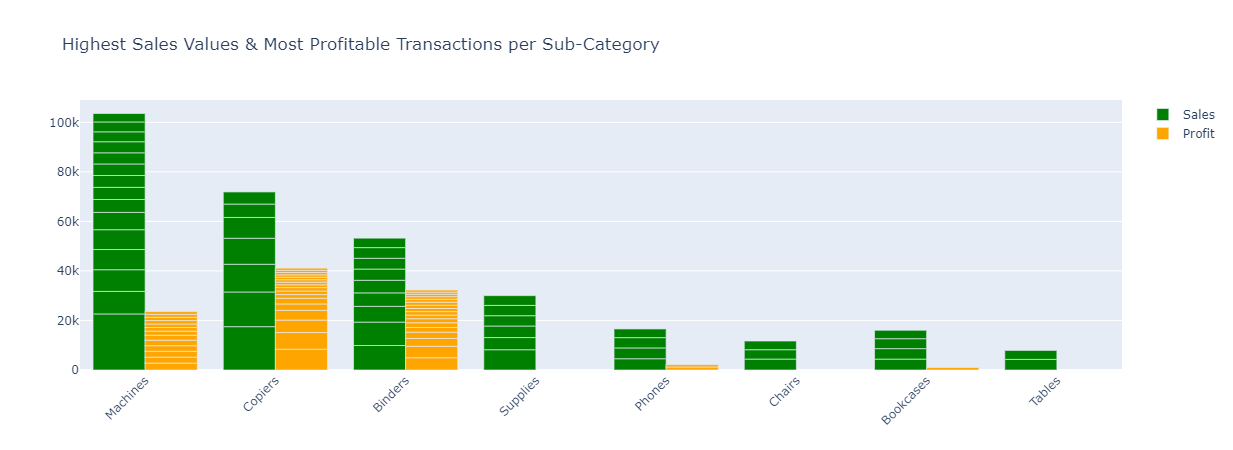

In [147]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_sub_sales['Sub-Category'],
    y=top_sub_sales['Sales'],
    name='Sales',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=top_sub_prof['Sub-Category'],
    y=top_sub_prof['Profit'],
    name='Profit',
    marker_color='orange'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', title_text='Highest Sales Values & Most Profitable Transactions per Sub-Category', xaxis_tickangle=-45)
fig.show()
#Interactive ploting of Top 50 Highest Sales Values & Most Profitable Transactions per Sub-Category
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the Toggle Spike Lines tab on the top right toolbar to view additional markers)

# Profit Loss

Total Profit Loss: -156131.2857
Total Office Supplies Profit Loss: -56615.258499999974
Total Furniture Profit Loss: -60936.109000000026
Total Technology Profit Loss: -38579.91820000001


<AxesSubplot:>

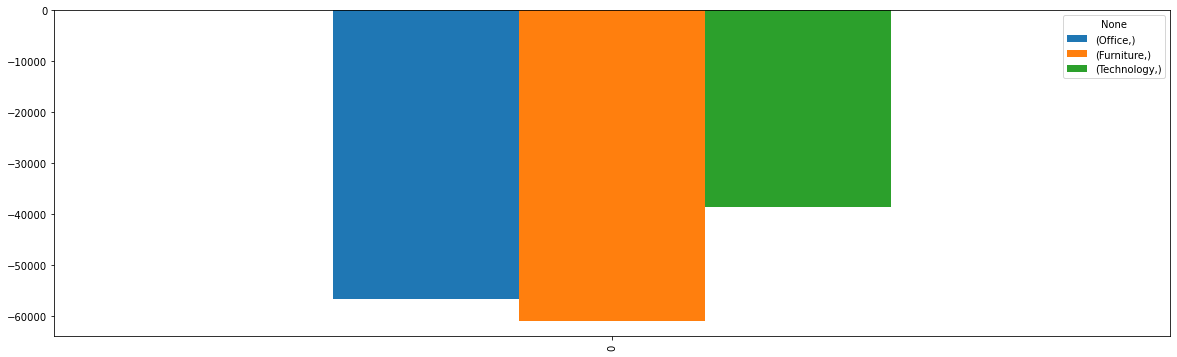

In [148]:
prof_loss=full_df[full_df['Profit']<0]
print('Total Profit Loss:',sum(prof_loss['Profit']))
#Sum of total profit loss (All values that are <0 in 'profit' column)
prof_loss_office=prof_loss.loc[prof_loss['Category'].isin(['Office Supplies'])]
off_prof_sum=sum(prof_loss_office['Profit'])
print('Total Office Supplies Profit Loss:', off_prof_sum)
#Sum of total profit loss from 'Office Supllies'(All values that are <0 in 'profit' column)
prof_loss_furn=prof_loss.loc[prof_loss['Category'].isin(['Furniture'])]
furn_loss_sum=sum(prof_loss_furn['Profit'])
print('Total Furniture Profit Loss:', furn_loss_sum)
#Sum of total profit loss from 'Furniture'(All values that are <0 in 'profit' column)
prof_loss_tech=prof_loss.loc[prof_loss['Category'].isin(['Technology'])]
tech_loss_sum=sum(prof_loss_tech['Profit'])
print('Total Technology Profit Loss:', tech_loss_sum)
loss_df=[[off_prof_sum, furn_loss_sum, tech_loss_sum]]
loss_df=pd.DataFrame(loss_df)
loss_df.columns=[['Office', 'Furniture', 'Technology']]
#loss_df=pd.DataFrame.transpose(loss_df)
#loss_df=loss_df.columns['Office Supplies', 'Furniture', 'Technology']
#loss_df = loss_df.rename(columns={'Office Supplies', 'Furniture', 'Technology'})
off_loss=loss_df[['Office']]
furn_loss=loss_df[['Furniture']]
tech_loss=loss_df[['Technology']]
off_prof_sum
loss_df.plot(kind='bar', figsize=(20,6))
#Sum of total profit loss from 'Technology'(All values that are <0 in 'profit' column)

# Time Series Analysis

## Transactions per Category, showing accumulated Profit with color representing Sub-Categories

##### Graph is provides additional data on hover and allows you to click the items in the legend to view specific data.
##### -Example (Try clicking any of the Sub-Category color tabs on the right to eliminate specific data, click it again to add it back)
##### -Example (Scroll to the top right corner of any of the following graphs to view the toolbar, where you can zoom into a specific time period to view data points.)
###### (Click the 3 dots below to view code for cell)

In [149]:
time_df=full_df[['Order ID', 'Order Date', 'Customer Name', 'Category', 'Sub-Category', 'City', 'Product ID', 'Sales', 'Profit']]
time_df['Order Date'] = pd.to_datetime(time_df['Order Date'])
time_df['Year'] = time_df['Order Date'].dt.year
time_df['Month'] = time_df['Order Date'].dt.month
time_df['Day']= time_df['Order Date'].dt.day
time_df=time_df[['Order ID', 'Order Date', 'Customer Name', 'Category', 'Sub-Category', 'City', 'Product ID', 'Sales', 'Profit', 'Year', 'Month', 'Day']]
#Create new dataframe from original 'df', assign it to time_df
#Create new columns 'Year', 'Month', 'Day' from 'Order Date'
time_df=time_df.sort_values(['Year', 'Month', 'Day'])
#Sort values by Year, Month, Day
#time_df['Profit Count'] = time_df['Profit'].cumsum()
#Create new column, 'Profit Count' with the running profit count
off_time=time_df.loc[time_df['Category'].isin(['Office Supplies'])]
off_time['Profit Count'] = off_time['Profit'].cumsum()
#Create new dataframe 'Off_time', where 'Office Supplies' is in 'Category'
#Create new column, 'Profit Count' with the running profit count
furn_time=time_df.loc[time_df['Category'].isin(['Furniture'])]
furn_time['Profit Count'] = furn_time['Profit'].cumsum()
#Create new dataframe 'furn_time', where 'Furniture' is in 'Category'
#Create new column, 'Profit Count' with the running profit count
tech_time=time_df.loc[time_df['Category'].isin(['Technology'])]
tech_time['Profit Count'] = tech_time['Profit'].cumsum()
#Create new dataframe 'tech_time', where 'Technology' is in 'Category'
#Create new column, 'Profit Count' with the running profit count
off_time_prof=off_time[['Order Date', 'Customer Name', 'Category', 'Sub-Category', 'Profit']]
fig = px.scatter(x=off_time['Order Date'], y=off_time['Profit Count'], color=off_time['Sub-Category'],labels={'x':'Profit to Date (Office Supplies)', 'y':'Profit to Date', 'color':'Sub-Category'})
fig2 = px.scatter(x=furn_time['Order Date'], y=furn_time['Profit Count'], color=furn_time['Sub-Category'],labels={'x':'Profit to Date (Furniture)', 'y':'Profit to Date', 'color':'Sub-Category'})
fig3 = px.scatter(x=tech_time['Order Date'], y=tech_time['Profit Count'], color=tech_time['Sub-Category'],labels={'x':'Profit to Date (Technology)', 'y':'Profit to Date', 'color':'Sub-Category'})

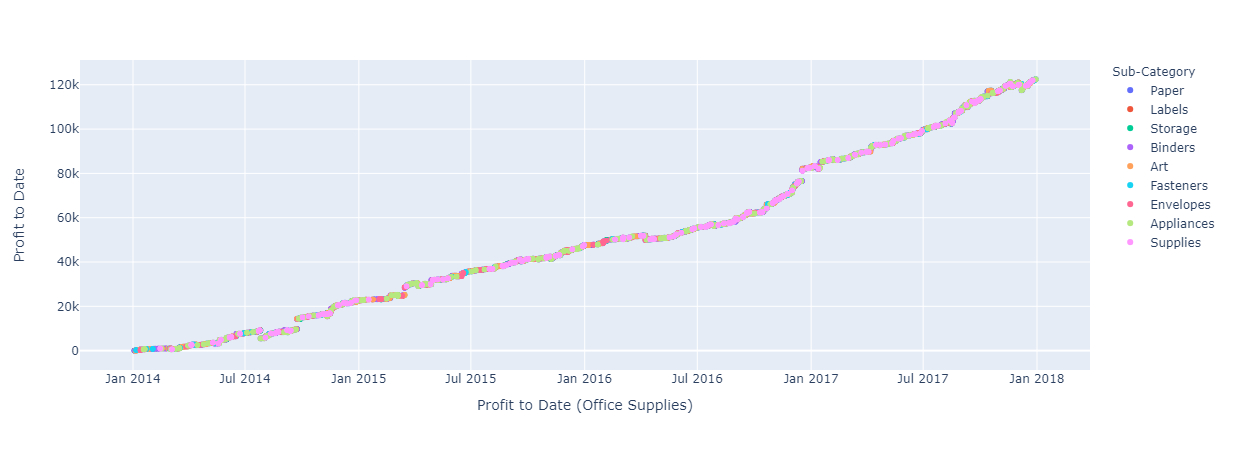

In [150]:
#Interactive ploting of Profit per Category and total percentage 
#Graph is interactive and provides additional data on hover and allows you to click the items in the legend to view specific data.
#Example (Try clicking the green Furniture tab on the right to eliminate Furniture data, click it again to add it back)

#Plotting  profits for Office Supplies
fig.show()

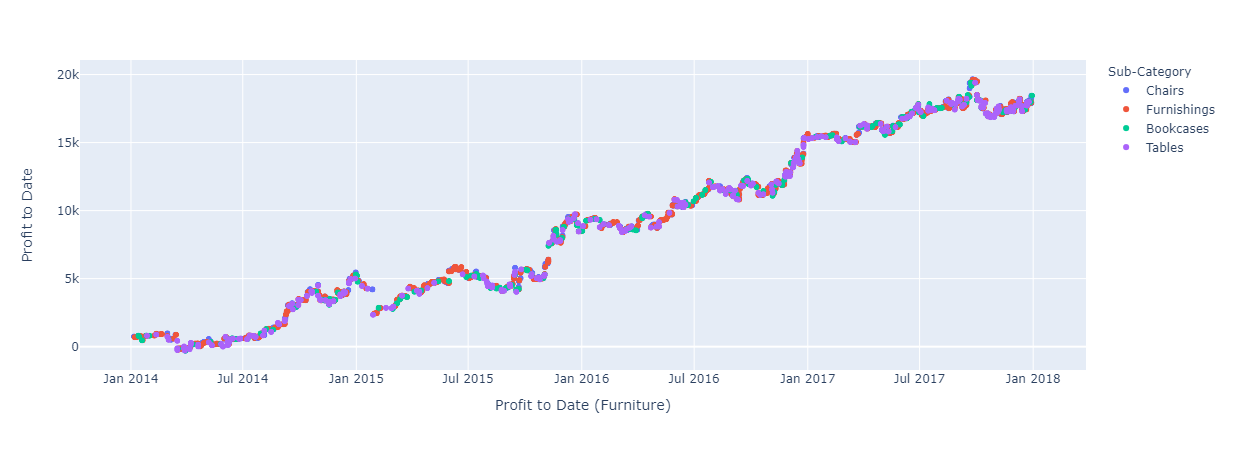

In [151]:
#Plotting  profits for Furniture
fig2.show()

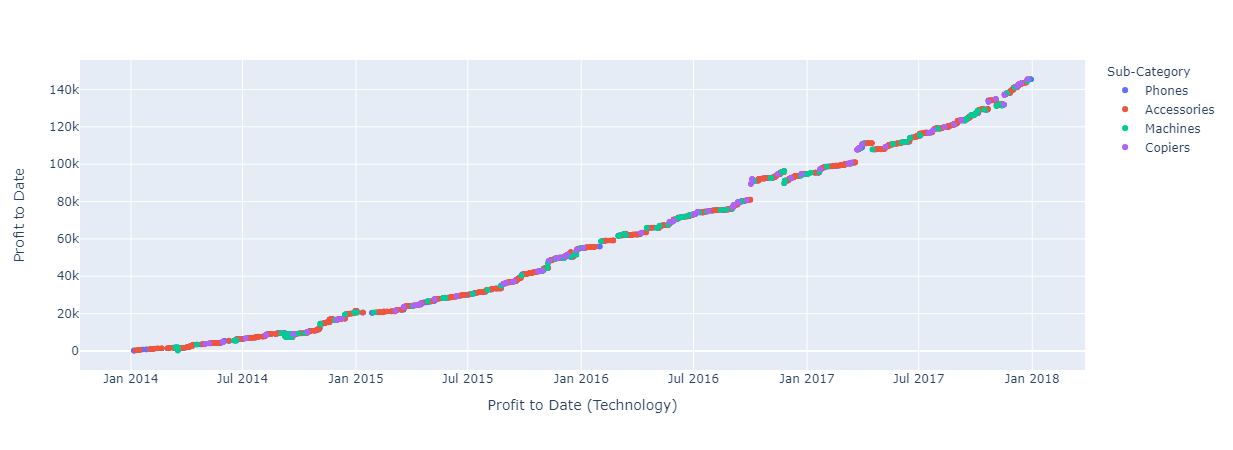

In [152]:
#Plotting  profits for Technology
fig3.show()

# Time-Series Profit Prediction Models (ARIMA/SARIMA)


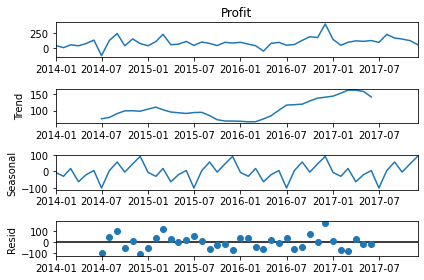

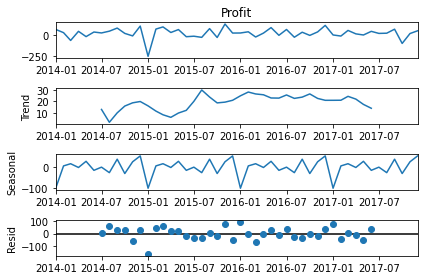

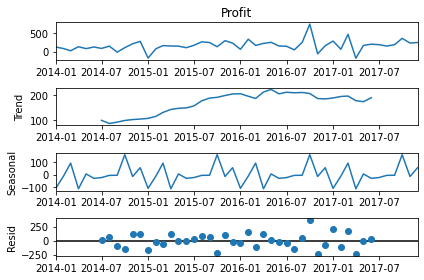

In [153]:
off_time_prof = off_time_prof.groupby('Order Date')['Profit'].sum().reset_index()
furn_time = furn_time.groupby('Order Date')['Profit'].sum().reset_index()
tech_time = tech_time.groupby('Order Date')['Profit'].sum().reset_index()
#Group each dataframe by Order Date and Profit sum, also rest index
off_time_prof= off_time_prof.set_index('Order Date')
furn_time= furn_time.set_index('Order Date')
tech_time= tech_time.set_index('Order Date')
#Set index as Order Date for each dataframe
x = off_time_prof['Profit'].resample('MS').mean()
y = furn_time['Profit'].resample('MS').mean()
z = tech_time['Profit'].resample('MS').mean()
#z.plot(figsize=(15, 6))
#Set 'x','y','z' as daily Profit Mean of each dataframe
decomposition_x = sm.tsa.seasonal_decompose(x, model='additive')
decomposition_x.plot()
#Office Supplies
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
#Furniture
decomposition_z = sm.tsa.seasonal_decompose(z, model='additive')
decomposition_z.plot()
#Technology
plt.show()


#Visualizing Seasonality Profit trends for each Category

## Observation:
Above we are able to visualize some trends within the Profit data and one glaring observation we can see here is that at the end of each year we see a significant decline in Profit, and this seasonality trend is true for all 3 Categories.

# Time-Series Profit Forecasting - Technology Category (ARIMA/SARIMA)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:654.8082131957045
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1675.5718109482636
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:487.0990107874286
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:481.7562709419609
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:641.7657276028872
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2105.2811943854185
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:483.15417029522166
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:483.57239670205735
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:649.5099150955725
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1917.6805983964405
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:485.9702284272503
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:481.8028493063594
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:643.5148887973893
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1964.5338538473652
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:483.1777940784085
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:483.4689326657572
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:642.7299408526821
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1826.946475647913
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:505.8

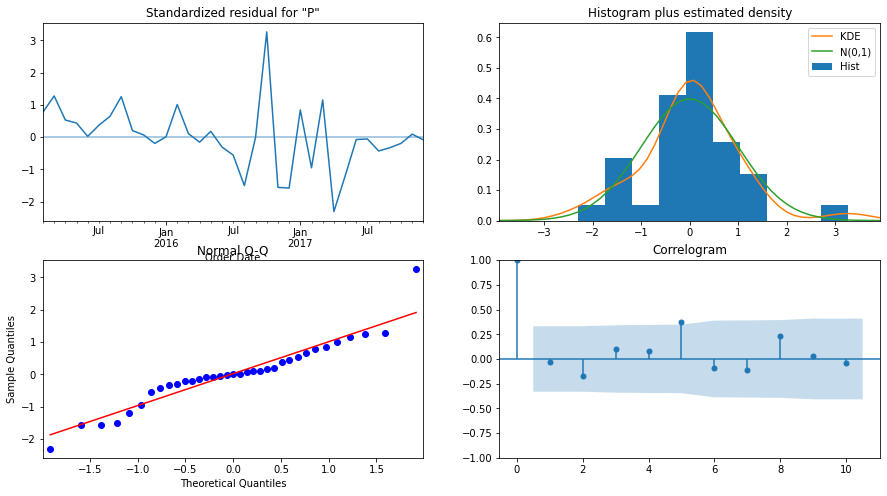

In [154]:
a = b = c = range(0, 2)
abc = list(itertools.product(a, b, c))
seasonal_abc_off = [(x[0], x[1], x[2], 12) for x in abc]
# Office Suppllies
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(y[0], y[1], y[2], 12) for y in pdq]
# Furniture
l = m = n = range(0, 2)
lmn = list(itertools.product(l, m, n))
seasonal_lmn_tech = [(z[0], z[1], z[2], 12) for z in lmn]
# Technology
#print(abc[1], seasonal_abc_off[1])
#print(abc[2], seasonal_abc_off[2])

#We generate possible parameters to fit the SARIMA model, for each Category
for param in pdq:
    for param_seasonal in seasonal_lmn_tech:
        try:
            model_tech = sm.tsa.statespace.SARIMAX(z, order=param, seasonal_order=param_seasonal, enforce_stationarity=True,
                                            enforce_invertibility=False)
            results_tech = model_tech.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_tech.aic))
        except:
            continue
# Technology
model_tech = sm.tsa.statespace.SARIMAX(z, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=True,
                                            enforce_invertibility=False)
results_tech = model_tech.fit()
print(results_tech.summary())
# Training the SARIMAX model for Technology.
results_tech.plot_diagnostics(figsize=(15, 8))
plt.show()
# Technology


### Evaluating and Visualizing Technology Forecast Model
Below we evaluate our model to get an understanding of validitity and set our model to forecast Profit for all of 2017 and base this forecast on our data starting point starting 2014-01-01 to 2016-12-31. From this we can see how accurate our model is compared to the actual data points from 2017.

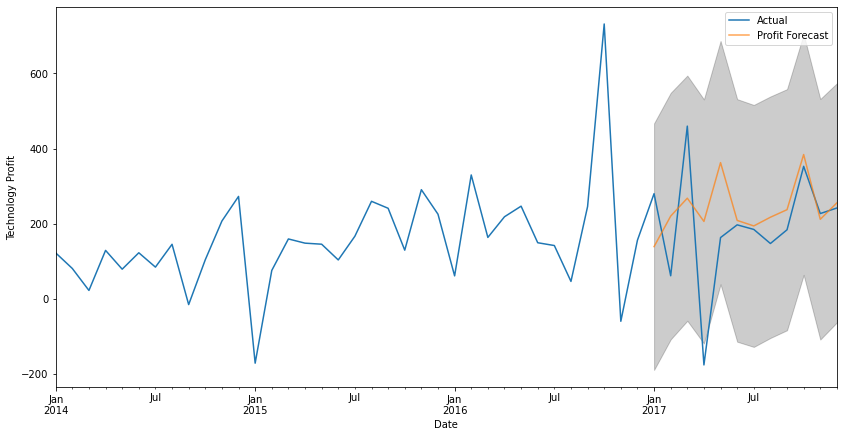

Mean Square Error is: 23086.7302
Root Mean Square Error is: 151.94318078431314


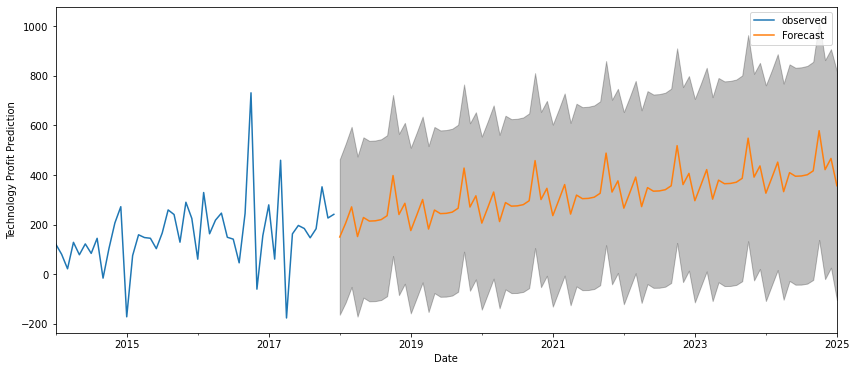

In [155]:
pred_tech = results_tech.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_t = pred_tech.conf_int()
#print(pred_ci_t)
axt = z['2014':].plot(label='Actual')
pred_tech.predicted_mean.plot(ax=axt, label='Profit Forecast', alpha=.7, figsize=(14, 7))
axt.fill_between(pred_ci_t.index,
                pred_ci_t.iloc[:, 0],
                pred_ci_t.iloc[:, 1], color='k', alpha=.2)
axt.set_xlabel('Date')
axt.set_ylabel('Technology Profit')
plt.legend()
plt.show()
z_predicted = pred_tech.predicted_mean
z_true = z['2017-01-01':]
mse = ((z_predicted - z_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))
# Technology
pred_uc_t = results_tech.get_forecast(steps=85)
pred_ci_t = pred_uc_t.conf_int()
ax = z.plot(label='observed', figsize=(14, 6))
pred_uc_t.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_t.index,
                pred_ci_t.iloc[:, 0],
                pred_ci_t.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Profit Prediction')
plt.legend()
plt.show()
# Forecasting future Technology Profits.
# Technology Seasonality Pattern and Profit Prediction

## Time-Series Profit Predection Models - Office Supplies Category (ARIMA/SARIMA)

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:605.3449790240306
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2320.9986161685642
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:447.004591464889
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:436.3065049248809
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:591.1160416494681
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1611.6192613022447
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:438.5674333078756
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:437.86466665962416
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:586.8191887436715
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1568.8887822979527
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:444.3754970068542
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:435.4997453530405
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:580.7188576303499
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1544.7045819167415
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:438.3424361091759
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:437.3859244764938
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:569.9074292243231
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1961.1827690909445
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:440.44

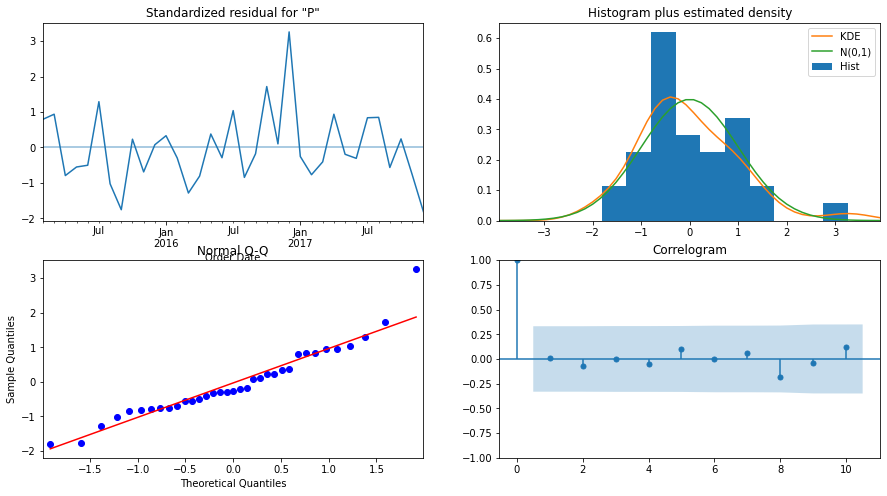

In [156]:
for param in abc:
    for param_seasonal in seasonal_abc_off:
        try:
            model_off = sm.tsa.statespace.SARIMAX(x, order=param, seasonal_order=param_seasonal, enforce_stationarity=True,
                                            enforce_invertibility=False)
            results_off = model_off.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_off.aic))
        except:
            continue
# Office Supplies
# Training the SARIMA model for Office Supplies.
model_off = sm.tsa.statespace.SARIMAX(x, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=True,
                                            enforce_invertibility=False)
results_off = model_off.fit()
print(results_off.summary())
#Print SARIMAX Results Summary
results_off.plot_diagnostics(figsize=(15, 8))
plt.show()
# Office Supplies

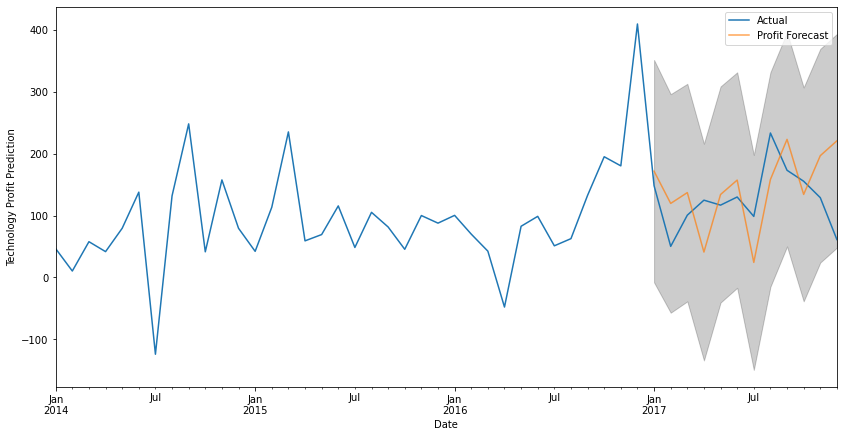

Mean Square Error is: 4911.8255
Root Mean Square Error is: 70.08441681699685


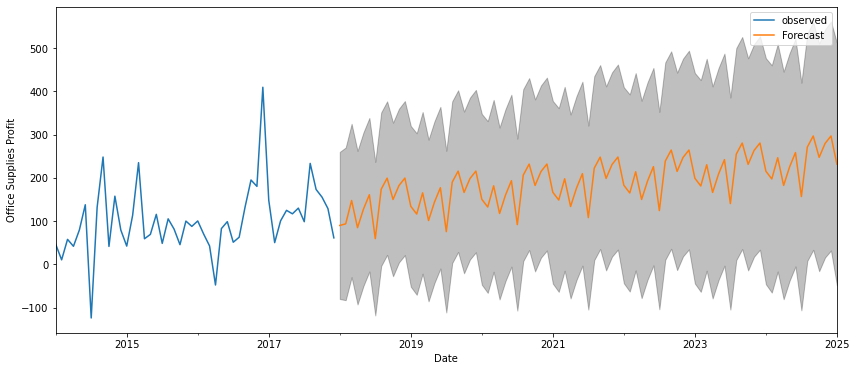

In [157]:
pred_off = results_off.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci_o = pred_off.conf_int()
axo = x['2014':].plot(label='Actual')
pred_off.predicted_mean.plot(ax=axo, label='Profit Forecast', alpha=.7, figsize=(14, 7))
axo.fill_between(pred_ci_o.index,
                pred_ci_o.iloc[:, 0],
                pred_ci_o.iloc[:, 1], color='k', alpha=.2)
axo.set_xlabel('Date')
axo.set_ylabel('Technology Profit Prediction')
plt.legend()
plt.show()
# Office Supplies
x_predicted = pred_off.predicted_mean
x_true = x['2017-01-01':]
mse = ((x_predicted - x_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))
# Office Supplies
# Forecasting the future (out of sample) values.
pred_uc_o = results_off.get_forecast(steps=85)
pred_ci_o = pred_uc_o.conf_int()
ax = x.plot(label='observed', figsize=(14, 6))
pred_uc_o.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_o.index,
                pred_ci_o.iloc[:, 0],
                pred_ci_o.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Profit')
plt.legend()
plt.show()

# Office Supplies

## Time-Series Profit Predection Models - Furniture Category (ARIMA/SARIMA)

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:534.2614442206371
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1923.2338671058696
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:431.5087831590878
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:415.22804226259564
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:536.2539005495145
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2160.42194876331
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:416.8427882900585
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:412.3992205272636
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:533.6506105781164
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1828.1538102209493
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:427.4085891522648
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:414.6058333385364
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:535.6179633685708
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2241.9694715403525
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:417.2087336158883
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:413.1138398421373
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:566.0741430839365
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2019.3540111739185
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:447.240

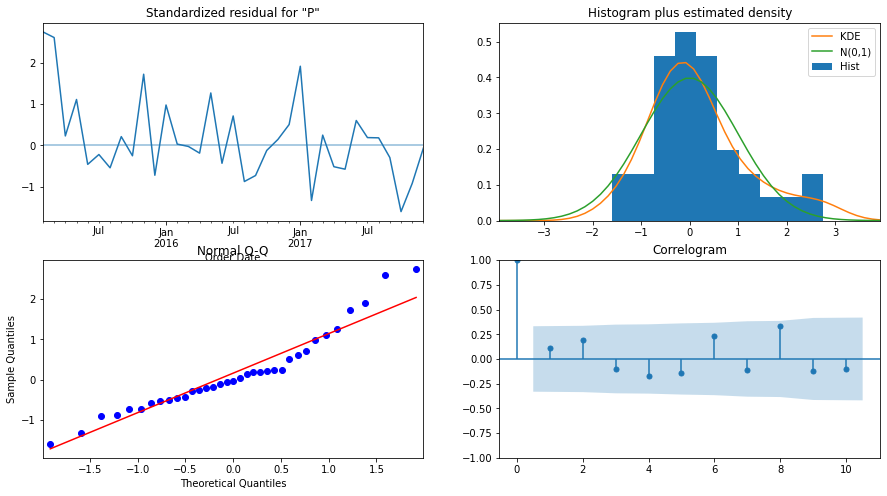

In [158]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=True,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
# Furniture
model = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=True,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary())
# Training the ARIMA model for Furniture Category.
results.plot_diagnostics(figsize=(15, 8))
plt.show()
# Furniture

### Evaluating and Visualizing Furniture Forecast Model
Below we evaluate our model to get an understanding of validitity and set our model to forecast Profit for all of 2017 and base this forecast on our data starting point starting 2014-01-01 to 2016-12-31. From this we can see how accurate our model is compared to the actual data points from 2017.

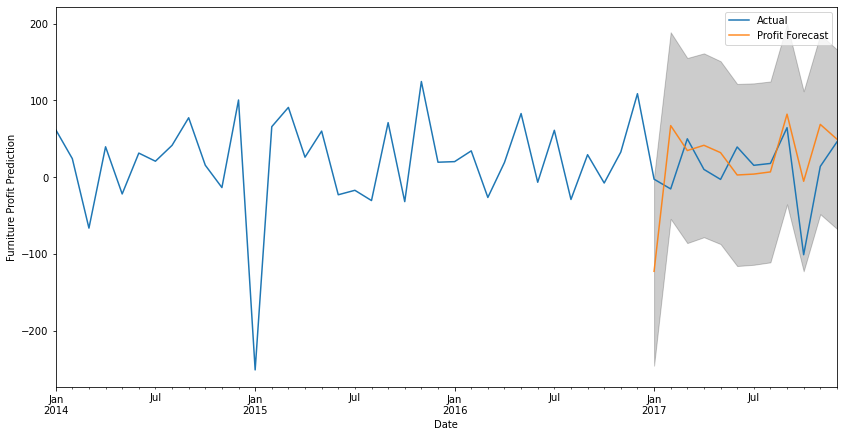

Mean Square Error is: 3145.4485
Root Mean Square Error is: 56.08429847060209


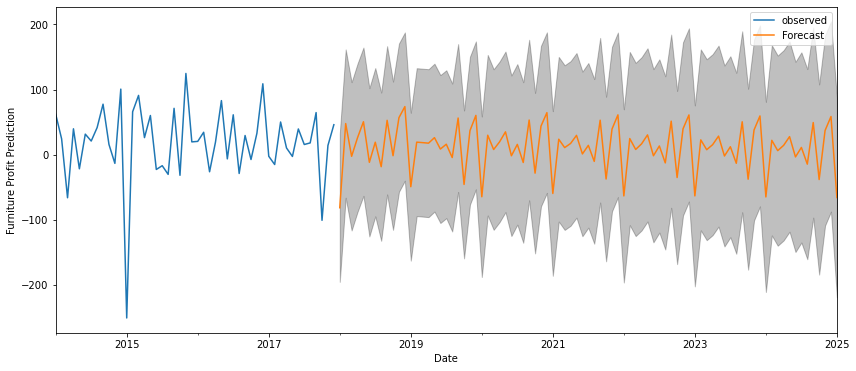

In [159]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Profit Forecast', alpha=.9, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Profit Prediction')
plt.legend()
plt.show()
# Furniture
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))
print('Root Mean Square Error is:', np.sqrt(mse))
# Furniture
# Forecasting future Furniture Profits
pred_uc = results.get_forecast(steps=85)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Profit Prediction')
plt.legend()
plt.show()
# Furniture

# EDA Conclusion

We can see from the data exploration and when implementing the prediction models, we know that the Furniture Category is not a very profitable Product Category for this business. Infact, the Furniture category seems to be trending downward in regards to profits. This could be a serious issue for the business and would need further exploration to determine how to resolve this. We could run further time-series forecasting models to verify that the trend is infact not going in the right direction and from that point we can start to look for solutions.